<a href="https://colab.research.google.com/github/Kynantio/PCVK/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kynantio Candra Abrari
# 2141720206 / 3A / 16

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

3. Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element
Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini

In [38]:
def dilasi_citra(F, w):
  height, width = F.shape

  image_copy = np.zeros((height, width), dtype=np.uint8)

  # generate structure element
  structure_element = np.ones((w,w), dtype=np.uint8)
  constant = (w - 1) // 2

  # melakukan proses dilasi
  for i in range(constant, height - constant):
    for j in range(constant, width - constant):
      temp = F[i-constant:i+constant+1,j-constant:j+constant+1]
      product = temp * structure_element
      image_copy[i,j]= np.max(product)

  return image_copy

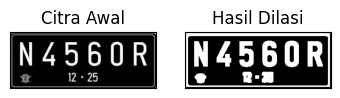

In [40]:
image = cv2.imread('/content/drive/MyDrive/Polinema/PCVK/Images/plat nomer.jpg', 0)

w = 5
ret, thresh = cv2.threshold(image , 125, 200, cv2.THRESH_BINARY)
image_copy = dilasi_citra(thresh, w)

plt.subplot(131),plt.imshow(image, cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(image_copy, cmap = 'gray')
plt.title('Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

4. Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED)
berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini

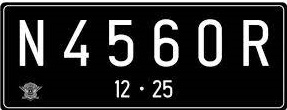

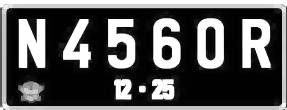

In [22]:
# Baca citra
image = cv2.imread('/content/drive/MyDrive/Polinema/PCVK/Images/plat nomer.jpg', cv2.IMREAD_GRAYSCALE)

# Membuat kernel/structuring element
kernel = np.ones((4, 4), np.uint8)  # Ubah ukuran kernel sesuai kebutuhan

# Lakukan dilasi pada citra
dilated_image = cv2.dilate(image, kernel, iterations=1)

# Menampilkan citra asli dan citra hasil dilasi
cv2_imshow(image)
cv2_imshow(dilated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

5. Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED)
berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini

In [41]:
def erosi_citra(F, k):
  height, width = F.shape

  structural_erosi = np.ones((k,k), dtype=np.uint8)
  constant = (k - 1) // 2

  image_copy = np.zeros((height, width), dtype=np.uint8)
  for i in range(constant, height - constant):
    for j in range(constant, width - constant):
      temp = F[i-constant:i+constant+1,j-constant:j+constant+1]
      product = temp * structural_erosi
      image_copy[i,j] = np.min(product)

  return image_copy

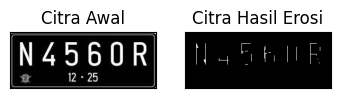

In [42]:
image = cv2.imread('/content/drive/MyDrive/Polinema/PCVK/Images/plat nomer.jpg', 0)

k = 5
ret, thresh = cv2.threshold(image, 175, 225, cv2.THRESH_BINARY)
image_copy = erosi_citra(thresh, k)

plt.subplot(131), plt.imshow(image, cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(image_copy, cmap = 'gray')
plt.title('Citra Hasil Erosi'),plt.xticks([]), plt.yticks([])
plt.show()

6. Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk
square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga
menghasilkan tampilan seperti di bawah ini

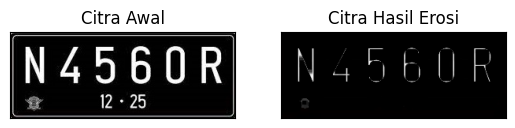

In [43]:
image = cv2.imread('/content/drive/MyDrive/Polinema/PCVK/Images/plat nomer.jpg')
kernel = np.ones((5,5), np.uint8)
erosion = cv2.erode(image, kernel,iterations = 1)

plt.subplot(121),plt.imshow(image),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(erosion), plt.title('Citra Hasil Erosi')
plt.xticks([]), plt.yticks([])
plt.show()

7. Buatlah program implementasi operasi opening dengan Structuring Element
berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini

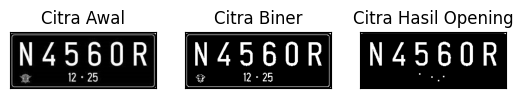

In [44]:
#Operasi Opening Dengan Menggunakan Library Morphology
img = cv2.imread('/content/drive/MyDrive/Polinema/PCVK/Images/plat nomer.jpg', 0)
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
openn = cv2.morphologyEx(thresh,cv2.MORPH_OPEN, kernel)

plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(thresh,cmap = 'gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])

plt.subplot(133),plt.imshow(openn,cmap = 'gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])

plt.show()

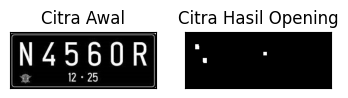

In [45]:
#Operasi Opening Tanpa Menggunakan Library Morphology
image = cv2.imread('/content/drive/MyDrive/Polinema/PCVK/Images/plat nomer.jpg', 0)

k = 7
reto, thresh = cv2.threshold(image, 127, 225, cv2.THRESH_BINARY)
image_result = dilasi_citra(erosi_citra(thresh,k),k)

plt.subplot(131), plt.imshow(image,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(image_result, cmap = 'gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])
plt.show()

8. Buatlah program implementasi operasi closing dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini

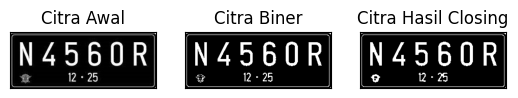

In [46]:
#Operasi Closing Dengan Menggunakan Library Morphology
image = cv2.imread('/content/drive/MyDrive/Polinema/PCVK/Images/plat nomer.jpg', 0)
ret, thresh = cv2.threshold(image, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
image_result = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE, kernel)

plt.subplot(131),plt.imshow(image,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(thresh,cmap = 'gray')

plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(image_result,cmap = 'gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])

plt.show()

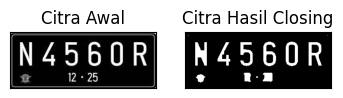

In [47]:
#Operasi Closing Tanpa Menggunakan Library Morphology
image = cv2.imread('/content/drive/MyDrive/Polinema/PCVK/Images/plat nomer.jpg', 0)

k = 7
retc, threshc = cv2.threshold(image, 127, 225, cv2.THRESH_BINARY)
image_copy = erosi_citra(dilasi_citra(threshc,k),k)

plt.subplot(131),plt.imshow(image,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(image_copy,cmap = 'gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])

plt.show()

9. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Cross 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini

In [48]:
#Cross 3 x 3
def dilasi_citra(F,w):
  p,q = F.shape

  imgD= np.zeros((p,q), dtype=np.uint8)
  SED= np.ones((w,w), dtype=np.uint8)
  SED = np.array([[0, 1, 0],
  [1, 1, 1],
  [0, 1, 0]], dtype = np.uint8)
  constant1 = (w-1)//2

  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j- constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)

  return imgD

SED = Cross 3


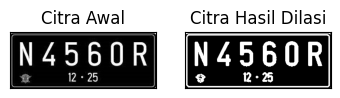

In [49]:
print('SED = Cross 3')

img_d = cv2.imread('/content/drive/MyDrive/Polinema/PCVK/Images/plat nomer.jpg', 0)

w = 3
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)
imgD = dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])

plt.show()

In [50]:
#Cross 5 x 5
def dilasi_citra(F,w):
  p,q= F.shape

  imgD= np.zeros((p,q), dtype=np.uint8)
  SED= np.ones((w,w), dtype=np.uint8)
  SED = np.array([
      [0, 0, 1, 0, 0],
      [0, 0, 1, 0, 0],
      [1, 1, 1, 1, 1],
      [0, 0, 1, 0, 0],
      [0, 0, 1, 0, 0]], dtype = np.uint8)

  constant1= (w-1)//2

  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-
      constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)

  return imgD

SED = Cross 5


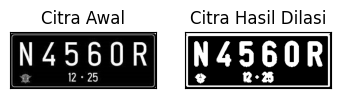

In [51]:
print('SED = Cross 5')
img_d= cv2.imread('/content/drive/MyDrive/Polinema/PCVK/Images/plat nomer.jpg', 0)

w = 5
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)
imgD = dilasi_citra(thresh,w)


plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])

plt.show()

10. .Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Circular 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini

In [52]:
#Circular 3 x 3
def dilasi_citra(F,w):
  #size image
  p,q= F.shape

  imgD= np.zeros((p,q), dtype=np.uint8)

  #Generate structure element dilasi (SED)
  SED= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(w,w))
  constant1= (w-1)//2

  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)

  return imgD

SED = Circular 3 x 3


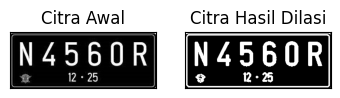

In [53]:
print('SED = Circular 3 x 3')
img_d= cv2.imread('/content/drive/MyDrive/Polinema/PCVK/Images/plat nomer.jpg',0)
ret, thresh = cv2.threshold(img_d, 127, 225,cv2.THRESH_BINARY)
w=3
imgD = dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

SED = Circular 5 X 5


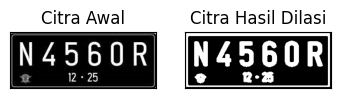

In [54]:
#Circular 5 x 5
print('SED = Circular 5 X 5')
img_d= cv2.imread('/content/drive/MyDrive/Polinema/PCVK/Images/plat nomer.jpg',0)
ret, thresh = cv2.threshold(img_d, 127, 225,cv2.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

11. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Rectangle 3 x 5 dan 5 x 7, sehingga menghasilkan tampilan seperti di bawah ini

In [55]:
#Rectangle 3 x 5
def erosi_citra(F,p,l):

  m,n= F.shape
  SE = cv2.getStructuringElement(cv2.MORPH_RECT,(p,l))
  constant1= (l-1)//2
  constant2= (p-1)//2

  imgE= np.zeros((m,n), dtype=np.uint8)

  for i in range(constant1, m-constant1):
    for j in range(constant2,n-constant2):
      temp= F[i-constant1:i+constant1+1, j-constant2:j+constant2+1]
      product= temp*SE
      imgE[i,j] = np.min(product)

  return imgE

SE = Rectangle 3 x 5


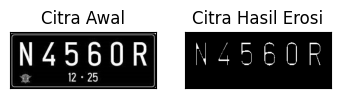

In [56]:
print('SE = Rectangle 3 x 5')

img_e= cv2.imread('/content/drive/MyDrive/Polinema/PCVK/Images/plat nomer.jpg', 0)

p, l = 5, 3
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
imgE = erosi_citra(thresh1,p,l)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])

plt.show()

SE = Rectangle 5 x 7


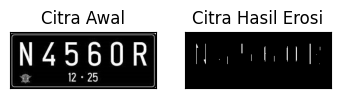

In [57]:
#Rectangle 5 x 7
print('SE = Rectangle 5 x 7')
img_e = cv2.imread('/content/drive/MyDrive/Polinema/PCVK/Images/plat nomer.jpg', 0)

l, p = 7, 5
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
imgE = erosi_citra(thresh1,p,l)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])

plt.show()

12. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Line Vertikal 3 dan 5, sehingga menghasilkan tampilan seperti di bawah ini

In [58]:
#Line Vertikal 3
def erosi_citra(F,k):
  m,n= F.shape

  SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(1,k))
  constant= (k-1)//2

  imgE= np.zeros((m,n), dtype=np.uint8)
  for i in range(constant, m-constant):
    for j in range(constant,n-constant):
      temp= F[i-constant:i+constant+1, j- constant:j+constant+1]
      product= temp*SE
      imgE[i,j]= np.min(product)

  return imgE

SE = Line Vertikal 3


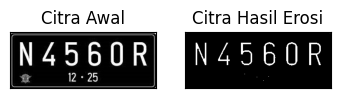

In [59]:
print('SE = Line Vertikal 3')

k = 3
img_e= cv2.imread('/content/drive/MyDrive/Polinema/PCVK/Images/plat nomer.jpg', 0)
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
imgE = erosi_citra(thresh1,k)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

SE = Line Vertikal 5


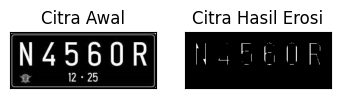

In [60]:
#Line Vertikal 5
print('SE = Line Vertikal 5')
img_e= cv2.imread('/content/drive/MyDrive/Polinema/PCVK/Images/plat nomer.jpg', 0)

k = 5
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
imgE = erosi_citra(thresh1,k)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

13. Tophat

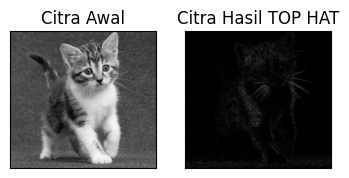

In [61]:
filterSize =(3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)

img = cv2.imread('/content/drive/MyDrive/Polinema/PCVK/Images/kitten01.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
tophat_img = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(tophat_img,cmap = 'gray')
plt.title('Citra Hasil TOP HAT'), plt.xticks([]), plt.yticks([])
plt.show()

14. Blackhat

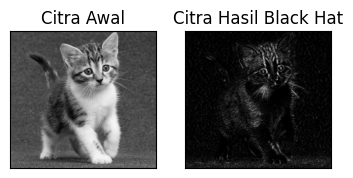

In [62]:
filterSize =(3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)
img = cv2.imread('/content/drive/MyDrive/Polinema/PCVK/Images/kitten01.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Applying the Black-Hat operation
Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, Kernel)


plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(blackhat,cmap = 'gray')
plt.title('Citra Hasil Black Hat'), plt.xticks([]), plt.yticks([])
plt.show()

15. Skeleton

In [63]:
from skimage import filters
from skimage.morphology import skeletonize

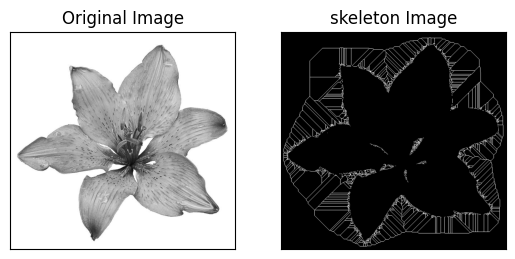

In [64]:
img = cv2.imread('/content/drive/MyDrive/Polinema/PCVK/Images/lily.jpg', 0)
binary = img > filters.threshold_triangle(img)
# true false to one
binary_cp = binary.copy()
binary_cp[binary_cp == True] = 1
binary_cp[binary_cp == False] = 0

# skeletonize image
skeleton = skeletonize(binary_cp)

# print images plt.figure(figsize=(20,20))

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(skeleton,cmap = 'gray')
plt.title('skeleton Image'), plt.xticks([]), plt.yticks([])

plt.savefig("binary and bin_skeleton.png")
plt.show()

16. Skeleton Inverse

In [65]:
from skimage import io, color, morphology

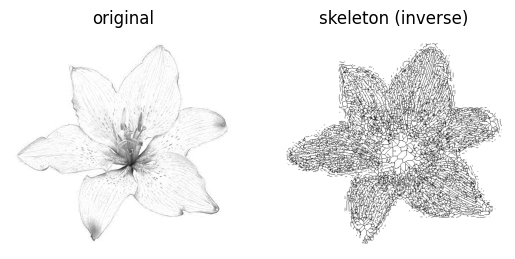

In [66]:
img = io.imread('/content/drive/MyDrive/Polinema/PCVK/Images/lily.jpg')[..., 0]

binary = img < filters.threshold_triangle(img)
skeleton = skeletonize(binary)
fig, ax = plt.subplots(1, 2)

ax[0].imshow(img, cmap='gray')
ax[0].set_title('original')
ax[0].set_axis_off()

# note the reversed colormap, gray_r
ax[1].imshow(skeleton, cmap='gray_r')
ax[1].set_title('skeleton (inverse)')
ax[1].set_axis_off()

plt.show()

17. Thickening

In [67]:
from skimage import img_as_float

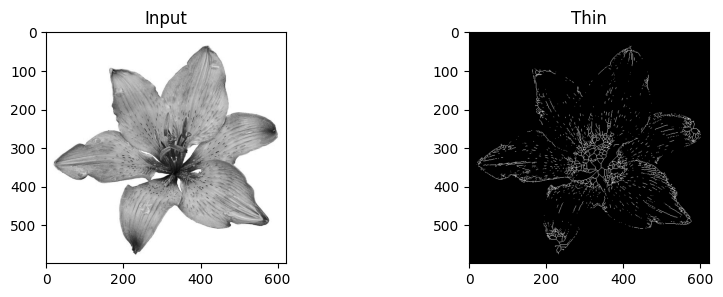

In [69]:
image = img_as_float(color.rgb2gray(io.imread('/content/drive/MyDrive/Polinema/PCVK/Images/lily.jpg')))

image_binary = image < 0.5
out_skeletonize = morphology.skeletonize(image_binary)
out_thin = morphology.thin(image_binary)
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 3))

ax0.imshow(image, cmap='gray')
ax0.set_title('Input')

ax1.imshow(out_thin, cmap='gray')
ax1.set_title('Thin')

plt.savefig('/content/drive/MyDrive/Polinema/PCVK/Images/lily.jpg')
plt.show()

Tugas Praktikum

Tugas Praktikum Morfologi melibatkan implementasi dataset KTP yang terdapat dalam
Modul 7. Dalam tugas ini, kita akan menggunakan semua informasi yang disediakan dalam
modul Morfologi dan menerapkan sejumlah nilai tambahan dalam kode sumber. Tujuannya
adalah agar citra KTP dapat terbaca dengan baik ketika teknik morfologi diterapkan pada citra
tersebut.

In [70]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

1. Dilasi

In [71]:
def conv2d(image, kernel, stride):

  height, width = image.shape[0], image.shape[1]
  kernel_height, kernel_width = kernel.shape[0], kernel.shape[1]

  start = int(kernel_width/2)

  image_result = np.copy(image)

  for y in range(start, height - start, stride):
    for x in range(start, width - start, stride):
      value = 0

      for ky in range(kernel_height):
        for kx in range(kernel_width):
          i = y - start + ky
          j = x - start + kx

          value += image[i, j] * kernel[ky, kx]

      image_result[y, x] = np.clip(value, 0, 255)

    return image_result

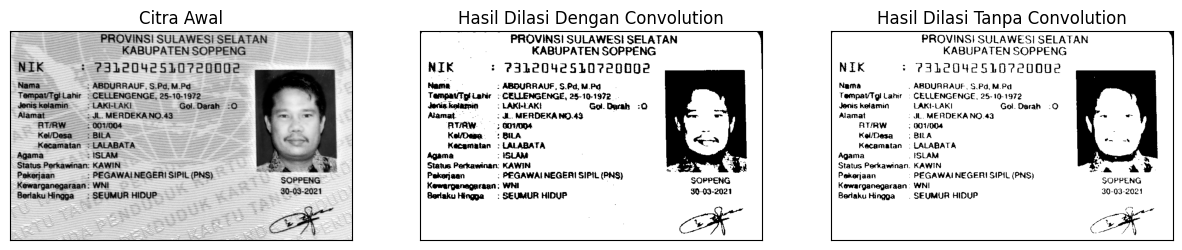

In [72]:
def Brightness (image, brightness):
  brightness_image = np.zeros(image.shape, image.dtype)

  for y in range(image.shape[0]):
    for x in range(image.shape[1]):
      for c in range(image.shape[2]):
        brightness_image[y,x,c] = np.clip(image[y,x,c] + brightness, 0, 255)

  return brightness_image

kernel_sharpen = np.array([[0, -1, 0],
                          [-1, 5, -1],
                          [0, -1, 0]], dtype = np.float32)

img = cv2.imread('/content/drive/MyDrive/Polinema/PCVK/Images/ktp_bapak_random.jpeg')

kernel_lsed = np.array([[1, 0, -1],
                          [2, 0, -3],
                          [1, 0, -2]], dtype=np.float32)

# cv2_imshow
result = conv2d(img, kernel_lsed,1)
brightness = Brightness(result, -35)

input = cv2.cvtColor(brightness, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(input, 127, 255, cv2.THRESH_BINARY)
kernel = np.ones((2,1),np.uint16)
dilasi = cv2.dilate(thresh,kernel,iterations = 1)


input2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret2, thresh2 = cv2.threshold(input2, 127, 255, cv2.THRESH_BINARY)
kernel2 = np.ones((2,1),np.uint16)
dilasi2 = cv2.dilate(thresh2,kernel2,iterations = 1)

plt.figure(figsize=(15,13))
plt.subplot(131),plt.imshow(input, cmap='gray'),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(dilasi, cmap='gray'),plt.title('Hasil Dilasi Dengan Convolution')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(dilasi2, cmap='gray'),plt.title('Hasil Dilasi Tanpa Convolution')
plt.xticks([]), plt.yticks([])
plt.show()

2. Closing

In [73]:
def convert_to_binary(image):
    # Konversi gambar ke dalam citra grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Terapkan fungsi thresholding dengan flag THRESH_OTSU
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    return binary

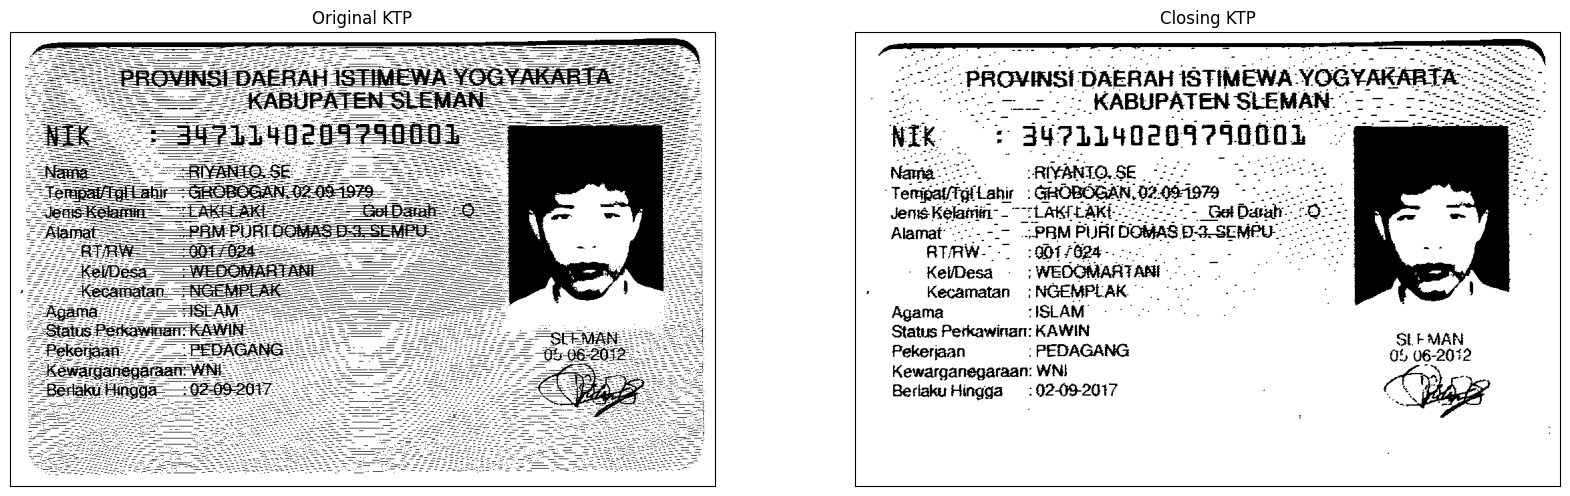

In [74]:
# Membaca citra KTP
ktp_image = cv2.imread('/content/drive/MyDrive/Polinema/PCVK/Images/ktp_riyanto.png')

# Ubah ke binary
ktp_image = convert_to_binary(ktp_image)

# Closing
kernel = np.array([[1, 1],
                              [1, 0]], dtype = np.uint8)
closs = cv2.morphologyEx(ktp_image,cv2.MORPH_CLOSE, kernel)

# Menampilkan citra KTP
plt.figure(figsize=(20,20))

plt.subplot(121),plt.imshow(X=ktp_image, cmap = 'gray')
plt.title('Original KTP'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(X=closs,cmap = 'gray')
plt.title('Closing KTP'), plt.xticks([]), plt.yticks([])

plt.show()

3. Black Hat

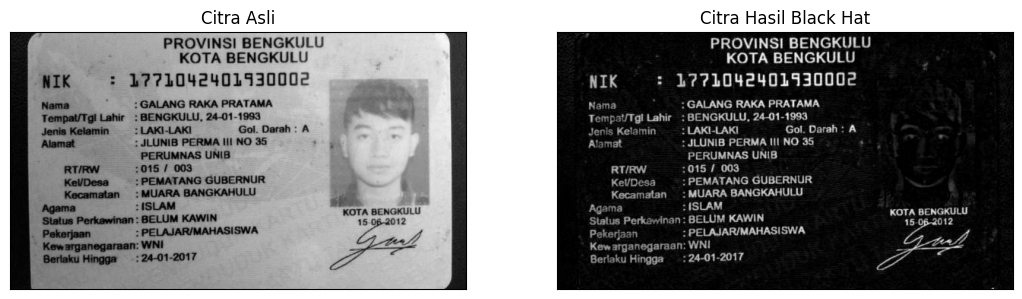

In [75]:
filterSize =(3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)
img = cv2.imread('/content/drive/MyDrive/Polinema/PCVK/Images/ktp_galang.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Applying the Black-Hat operation
Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, Kernel)

plt.figure(figsize=(20, 6))
plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Citra Asli'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(blackhat, cmap='gray')
plt.title('Citra Hasil Black Hat'), plt.xticks([]), plt.yticks([])

plt.show()

4. Erosi

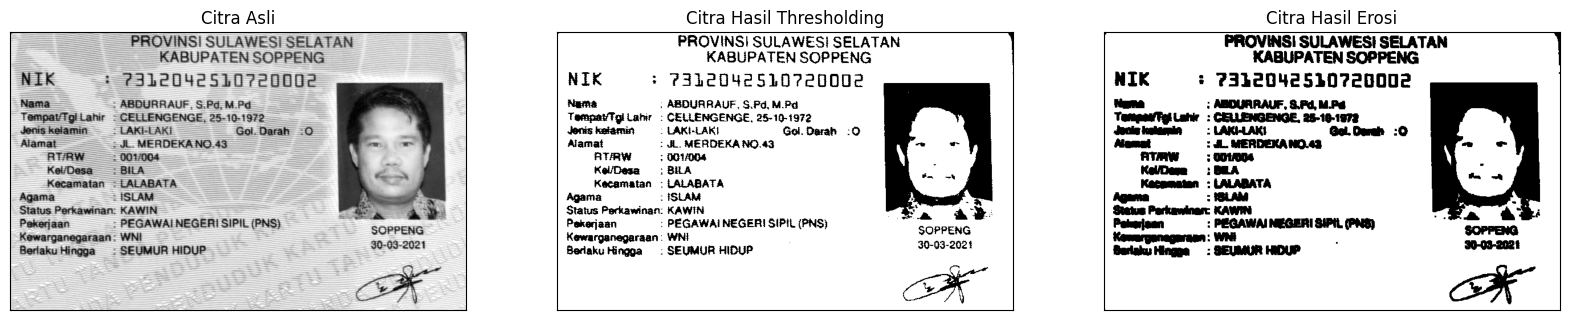

In [76]:
# Membaca citra
img = cv2.imread('/content/drive/MyDrive/Polinema/PCVK/Images/ktp_bapak_random.jpeg', 0)

# Melakukan thresholding
ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

kernel = np.ones((3, 3), np.uint8)
eroded = cv2.erode(thresh, kernel, iterations=1)

plt.figure(figsize=(20, 6))
plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Citra Asli'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(thresh, cmap='gray')
plt.title('Citra Hasil Thresholding'), plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow(eroded, cmap='gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])

plt.show()

5. Opening

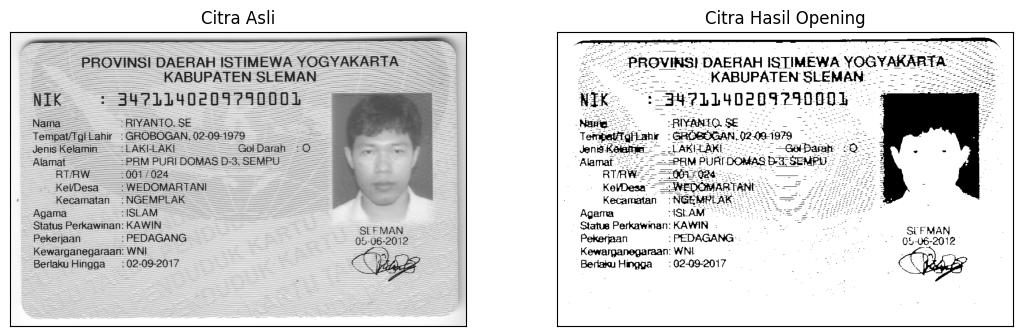

In [77]:
image_path = '/content/drive/MyDrive/Polinema/PCVK/Images/ktp_riyanto.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

ret, threshold = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
kernel = np.ones((3,3), np.uint8)
image_opening = cv2.morphologyEx(threshold, cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(20, 16))
plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title('Citra Asli'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(image_opening, cmap='gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])

plt.show()

6. Top Hat

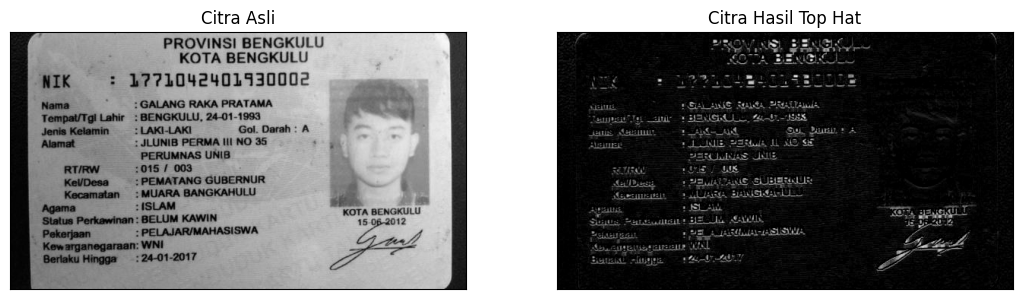

In [78]:
filterSize =(3, 6)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)

img = cv2.imread('/content/drive/MyDrive/Polinema/PCVK/Images/ktp_galang.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
tophat_img = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))

plt.figure(figsize=(20, 6))
plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Citra Asli'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(tophat_img, cmap='gray')
plt.title('Citra Hasil Top Hat'), plt.xticks([]), plt.yticks([])

plt.show()